In [5]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
df2=pd.read_csv('avocado.csv')
# --- PASO PREVIO: Asegurarse que 'df2' existe y está preparado ---
# Asumimos que df2 es el DataFrame original cargado previamente.
if 'df2' not in locals() or not isinstance(df2, pd.DataFrame):
    print("Error: El DataFrame 'df2' no parece estar cargado o no es un DataFrame.")
    exit()
else:
    print("Usando el DataFrame 'df2' existente.")
    # Verificar que la columna 'region' existe
    if 'region' not in df2.columns:
        print("Error: La columna 'region' no se encontró en df2.")
        exit()

# --- 1. Definir el Mapeo de Subregión a Región Principal ---

# !! IMPORTANTE !! Revisa y ajusta este diccionario según tu conocimiento
# o los criterios específicos que quieras usar para la jerarquía.
# He agrupado NNE bajo Northeast como sugeriste.
# Las 9 regiones principales se mapean a sí mismas.
# TotalUS se mapea a sí mismo.

region_mapping = {
    # Northeast (Incluyendo NorthernNewEngland)
    'Albany': 'Northeast', 'BaltimoreWashington': 'Northeast', 'Boston': 'Northeast',
    'BuffaloRochester': 'Northeast', 'HarrisburgScranton': 'Northeast',
    'HartfordSpringfield': 'Northeast', 'NewYork': 'Northeast', 'Philadelphia': 'Northeast',
    'Syracuse': 'Northeast', 'NorthernNewEngland': 'Northeast', # NNE agrupado en NE
    'Northeast': 'Northeast', # Región principal se mapea a sí misma

    # Southeast
    'Atlanta': 'Southeast', 'Charlotte': 'Southeast', 'Jacksonville': 'Southeast',
    'MiamiFtLauderdale': 'Southeast', 'Orlando': 'Southeast', 'RaleighGreensboro': 'Southeast',
    'RichmondNorfolk': 'Southeast', 'Roanoke': 'Southeast', 'SouthCarolina': 'Southeast',
    'Tampa': 'Southeast', 'Nashville': 'Southeast', # Nashville más común en SE
    'Southeast': 'Southeast', # Región principal

    # GreatLakes (Incluye algunas ciudades que a veces se ponen en Midsouth)
    'Chicago': 'GreatLakes', 'CincinnatiDayton': 'GreatLakes', 'Columbus': 'GreatLakes',
    'Detroit': 'GreatLakes', 'GrandRapids': 'GreatLakes', 'Indianapolis': 'GreatLakes',
    'Pittsburgh': 'GreatLakes',
    'GreatLakes': 'GreatLakes', # Región principal

    # Midsouth (Según tu lista de principales)
    'Louisville': 'Midsouth', 'StLouis': 'Midsouth', # StLouis aquí
    'Midsouth': 'Midsouth', # Región principal

    # SouthCentral
    'DallasFtWorth': 'SouthCentral', 'Houston': 'SouthCentral', 'NewOrleansMobile': 'SouthCentral',
    'SouthCentral': 'SouthCentral', # Región principal

    # WestTexNewMexico
    'WestTexNewMexico': 'WestTexNewMexico', # Región principal

    # Plains
    'Boise': 'Plains', 'Denver': 'Plains', # Boise asignado aquí
    'Plains': 'Plains', # Región principal

    # West
    'California': 'West', 'LasVegas': 'West', 'LosAngeles': 'West', 'PhoenixTucson': 'West',
    'Portland': 'West', 'Sacramento': 'West', 'SanDiego': 'West', 'SanFrancisco': 'West',
    'Seattle': 'West', 'Spokane': 'West',
    'West': 'West', # Región principal

    # Caso Especial
    'TotalUS': 'TotalUS'
}

print("\nMapeo de Regiones Definido.")
# Puedes imprimir el diccionario 'region_mapping' si quieres verlo completo

# --- 2. Crear la Nueva Columna "Clasificación" ---

# Usamos el método .map() en la columna 'region' de df2.
# .map() buscará cada valor de 'region' en las claves del diccionario 'region_mapping'
# y devolverá el valor asociado (la región principal).
# Si una región de df2 no está en el diccionario, .map() devolverá NaN.
df2['Clasificación'] = df2['region'].map(region_mapping)

print("Nueva columna 'Clasificación' creada.")

# --- 3. Verificar Resultados ---

# Contar cuántas filas corresponden a cada Región Principal (Clasificación)
print("\nConteo de filas por nueva 'Clasificación':")
print(df2['Clasificación'].value_counts(dropna=False)) # dropna=False muestra si hay NaNs (regiones no mapeadas)

# Verificar si hubo regiones que no se pudieron mapear (resultando en NaN)
unmapped_regions = df2[df2['Clasificación'].isnull()]['region'].unique()
if len(unmapped_regions) > 0:
    print(f"\n¡Advertencia! Las siguientes regiones en df2 no se encontraron en el mapeo y tienen 'Clasificación' = NaN:")
    print(unmapped_regions)
    print("Deberías añadirlas al diccionario 'region_mapping' si quieres clasificarlas.")
else:
    print("\nTodas las regiones fueron mapeadas exitosamente.")

# Mostrar las primeras filas con la nueva columna
print("\nPrimeras 5 filas de df2 con la nueva columna 'Clasificación':")
print(df2[['region', 'Clasificación']].head())

# Mostrar un ejemplo de una subregión y su clasificación
print("\nEjemplo de clasificación para 'LosAngeles':")
print(df2[df2['region'] == 'LosAngeles'][['region', 'Clasificación']].head(1))
print("\nEjemplo de clasificación para 'West' (región principal):")
print(df2[df2['region'] == 'West'][['region', 'Clasificación']].head(1))

Usando el DataFrame 'df2' existente.

Mapeo de Regiones Definido.
Nueva columna 'Clasificación' creada.

Conteo de filas por nueva 'Clasificación':
Clasificación
Southeast           4056
Northeast           3718
West                3718
GreatLakes          2704
SouthCentral        1352
Plains              1014
Midsouth            1014
TotalUS              338
WestTexNewMexico     335
Name: count, dtype: int64

Todas las regiones fueron mapeadas exitosamente.

Primeras 5 filas de df2 con la nueva columna 'Clasificación':
   region Clasificación
0  Albany     Northeast
1  Albany     Northeast
2  Albany     Northeast
3  Albany     Northeast
4  Albany     Northeast

Ejemplo de clasificación para 'LosAngeles':
          region Clasificación
1144  LosAngeles          West

Ejemplo de clasificación para 'West' (región principal):
     region Clasificación
2704   West          West


In [7]:
import pandas as pd
import math

# --- Asumimos que df2 ya está cargado ---

# 1. Haz una copia de df2 en df
df = df2.copy()
# print("DataFrame 'df' creado como copia de 'df2'.") # Comentado para brevedad

# 2. Convierte la columna 'Date' a datetime
df['Date'] = pd.to_datetime(df['Date'])
# print("Columna 'Date' convertida a formato datetime.") # Comentado

# --- Asegúrate de que la columna 'Clasificación' existe en df ---
# (Si df viene de df2 donde ya se creó, debería estar)
if 'Clasificación' not in df.columns:
    print("¡Error! La columna 'Clasificación' no se encontró en 'df'.")
    # Aquí podrías volver a ejecutar el código que crea 'Clasificación' en df si fuera necesario
    # O detener la ejecución raise ValueError("Columna 'Clasificación' faltante.")
else:
    print("Columna 'Clasificación' encontrada.")


# 3. Obtén todas las fechas únicas (Domingos) del dataset y ordénalas
unique_dates = sorted(df['Date'].unique())
# print(f"Fechas únicas encontradas (primeras 10): {unique_dates[:10]}") # Comentado

# 4. Crea un diccionario para mapear cada fecha original a la fecha final de su periodo bisemanal
date_to_biweek_end_map = {}
# print("\nCreando mapeo de fecha original a fecha final del periodo bisemanal...") # Comentado

for i in range(0, len(unique_dates), 2): # Itera de 2 en 2
    date1 = unique_dates[i]
    if i + 1 < len(unique_dates):
        date2 = unique_dates[i+1]
        date_to_biweek_end_map[date1] = date2
        date_to_biweek_end_map[date2] = date2
    else:
        date_to_biweek_end_map[date1] = date1
# print("Mapeo creado.") # Comentado

# 5. Aplica este mapeo para crear una nueva columna en el DataFrame 'df'
df['BiWeekEndDate'] = df['Date'].map(date_to_biweek_end_map)
# print("Nueva columna 'BiWeekEndDate' creada aplicando el mapeo.") # Comentado

null_dates = df['BiWeekEndDate'].isnull().sum()
if null_dates > 0:
    print(f"¡ADVERTENCIA! {null_dates} filas no pudieron mapear su fecha a BiWeekEndDate.")
# else:
    # print("Todas las filas mapeadas correctamente.") # Comentado

# 6. Define las columnas por las que agrupar AHORA: type, region, Clasificación y la NUEVA fecha final
#    ¡¡CAMBIO CLAVE AQUÍ: Añadimos 'Clasificación' a la lista!!
grouping_cols_manual = ['type', 'region', 'Clasificación', 'BiWeekEndDate']
print(f"Se agrupará por: {grouping_cols_manual}")

# 7. Define las columnas numéricas cuya media queremos calcular
numeric_cols_to_average = [
    'AveragePrice', 'Total Volume', '4046', '4225', '4770',
    'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'
]
cols_existentes = [col for col in numeric_cols_to_average if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
print(f"Columnas numéricas que se promediarán: {cols_existentes}")
numeric_cols_to_average = cols_existentes

# 8. Agrupa usando las nuevas columnas y calcula la media
print("\nIniciando agrupación y cálculo de la media...")
final_df_manual = df.groupby(grouping_cols_manual, as_index=False)[numeric_cols_to_average].mean()
print("Agrupación y cálculo de media completados.")

# 9. Renombra la columna de fecha final para mayor claridad
final_df_manual = final_df_manual.rename(columns={'BiWeekEndDate': 'Date'})
print("Columna 'BiWeekEndDate' renombrada a 'Date'.")

# 10. Ordena el resultado para facilitar la verificación
final_df_manual = final_df_manual.sort_values(by=['type', 'region', 'Date'])

# (Opcional) Reordenar columnas para mejor legibilidad - Asegúrate de incluir 'Clasificación'
cols_order = ['type', 'region', 'Clasificación', 'Date'] + numeric_cols_to_average
cols_order = [col for col in cols_order if col in final_df_manual.columns] # Asegura que todas existan
final_df_manual = final_df_manual[cols_order]
print("Columnas reordenadas.")

# --- Mostrar resultados ---
print("\nPrimeras 5 filas del DataFrame final ('final_df_manual') con datos agregados manualmente:")
try:
  from IPython.display import display
  display(final_df_manual.head())
except ImportError:
  print(final_df_manual.head().to_markdown(index=False, numalign="left", stralign="left"))

print(f"\nDimensiones del DataFrame final: {final_df_manual.shape}")
print(f"\nColumnas en el DataFrame final: {final_df_manual.columns.tolist()}")

# Verificar las fechas resultantes AHORA
print("\nPrimeras 10 fechas únicas en la columna 'Date' del resultado final:")
unique_dates_final = sorted(final_df_manual['Date'].unique())
print(unique_dates_final[:10])

# Verificar un ejemplo
print("\nEjemplo de datos agregados para Albany, tipo conventional, primeras fechas:")
example_df_manual = final_df_manual[(final_df_manual['region'] == 'Albany') & (final_df_manual['type'] == 'conventional')].head()
try:
  from IPython.display import display
  display(example_df_manual)
except ImportError:
  print(example_df_manual.to_markdown(index=False, numalign="left", stralign="left"))

Columna 'Clasificación' encontrada.
Se agrupará por: ['type', 'region', 'Clasificación', 'BiWeekEndDate']
Columnas numéricas que se promediarán: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

Iniciando agrupación y cálculo de la media...
Agrupación y cálculo de media completados.
Columna 'BiWeekEndDate' renombrada a 'Date'.
Columnas reordenadas.

Primeras 5 filas del DataFrame final ('final_df_manual') con datos agregados manualmente:


,type,region,Clasificación,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,conventional,Albany,Northeast,2015-01-11,1.230,41034.180,1911.175,29963.880,88.510,9070.615,8611.485,459.130,0.0
1,conventional,Albany,Northeast,2015-01-25,1.115,44829.390,927.760,32368.240,149.955,11383.435,10877.220,506.215,0.0
2,conventional,Albany,Northeast,2015-02-08,0.990,61063.785,1355.635,49564.505,171.285,9972.360,9641.960,330.400,0.0
3,conventional,Albany,Northeast,2015-02-22,1.065,43621.335,1037.520,32550.820,186.710,9846.285,9490.015,356.270,0.0
4,conventional,Albany,Northeast,2015-03-08,1.030,48051.550,712.570,38001.990,170.270,9166.720,8906.805,259.915,0.0



Dimensiones del DataFrame final: (9179, 13)

Columnas en el DataFrame final: ['type', 'region', 'Clasificación', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

Primeras 10 fechas únicas en la columna 'Date' del resultado final:
[Timestamp('2015-01-11 00:00:00'), Timestamp('2015-01-25 00:00:00'), Timestamp('2015-02-08 00:00:00'), Timestamp('2015-02-22 00:00:00'), Timestamp('2015-03-08 00:00:00'), Timestamp('2015-03-22 00:00:00'), Timestamp('2015-04-05 00:00:00'), Timestamp('2015-04-19 00:00:00'), Timestamp('2015-05-03 00:00:00'), Timestamp('2015-05-17 00:00:00')]

Ejemplo de datos agregados para Albany, tipo conventional, primeras fechas:


,type,region,Clasificación,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,conventional,Albany,Northeast,2015-01-11,1.230,41034.180,1911.175,29963.880,88.510,9070.615,8611.485,459.130,0.0
1,conventional,Albany,Northeast,2015-01-25,1.115,44829.390,927.760,32368.240,149.955,11383.435,10877.220,506.215,0.0
2,conventional,Albany,Northeast,2015-02-08,0.990,61063.785,1355.635,49564.505,171.285,9972.360,9641.960,330.400,0.0
3,conventional,Albany,Northeast,2015-02-22,1.065,43621.335,1037.520,32550.820,186.710,9846.285,9490.015,356.270,0.0
4,conventional,Albany,Northeast,2015-03-08,1.030,48051.550,712.570,38001.990,170.270,9166.720,8906.805,259.915,0.0


##Matriz correlacion


Preparando datos para el gráfico CONVENTIONAL...
Generando gráfico CONVENTIONAL...
Establecidas 85 marcas en el eje X para Conventional.


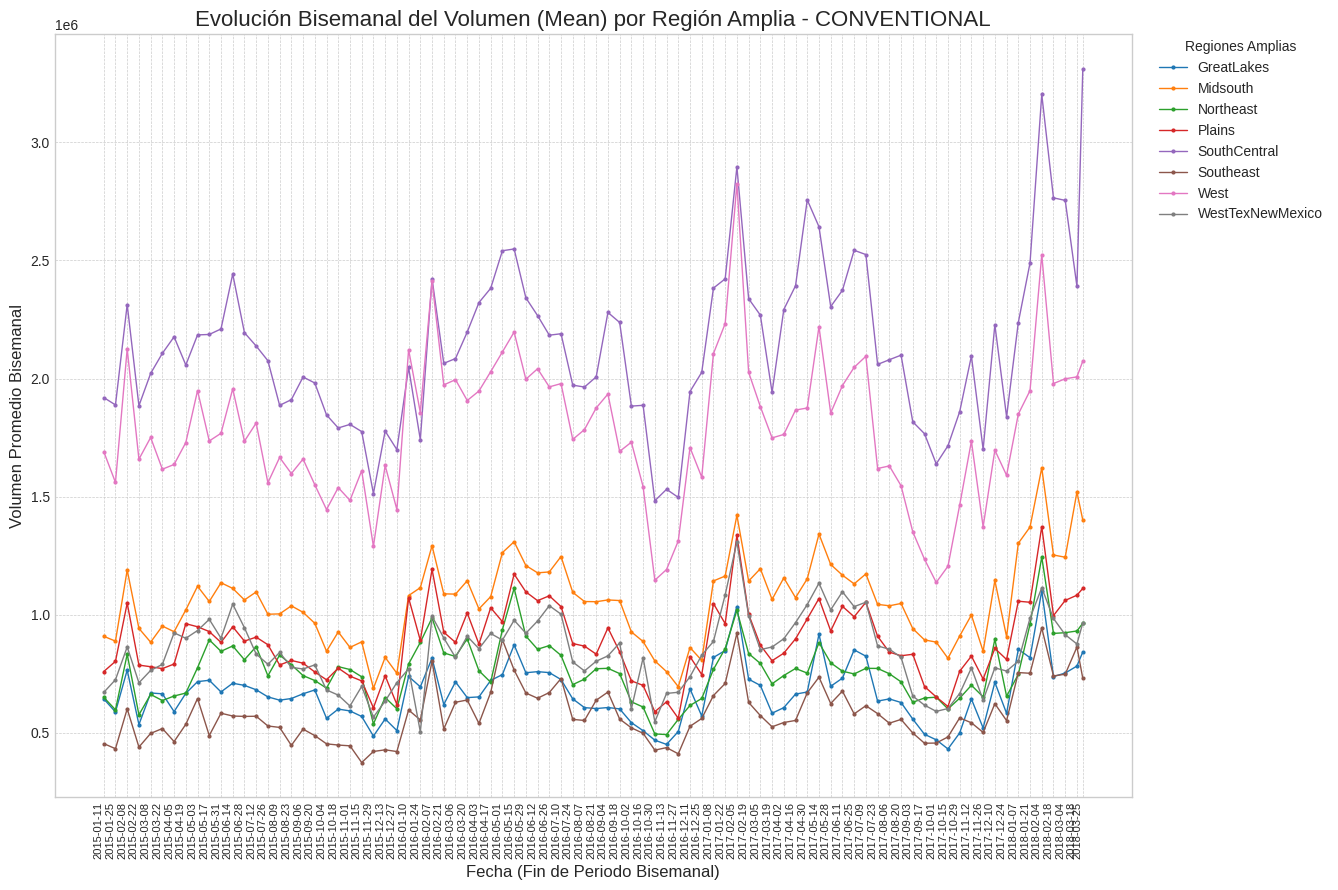


Preparando datos para el gráfico ORGANIC...
Generando gráfico ORGANIC...
Establecidas 85 marcas en el eje X para Organic.


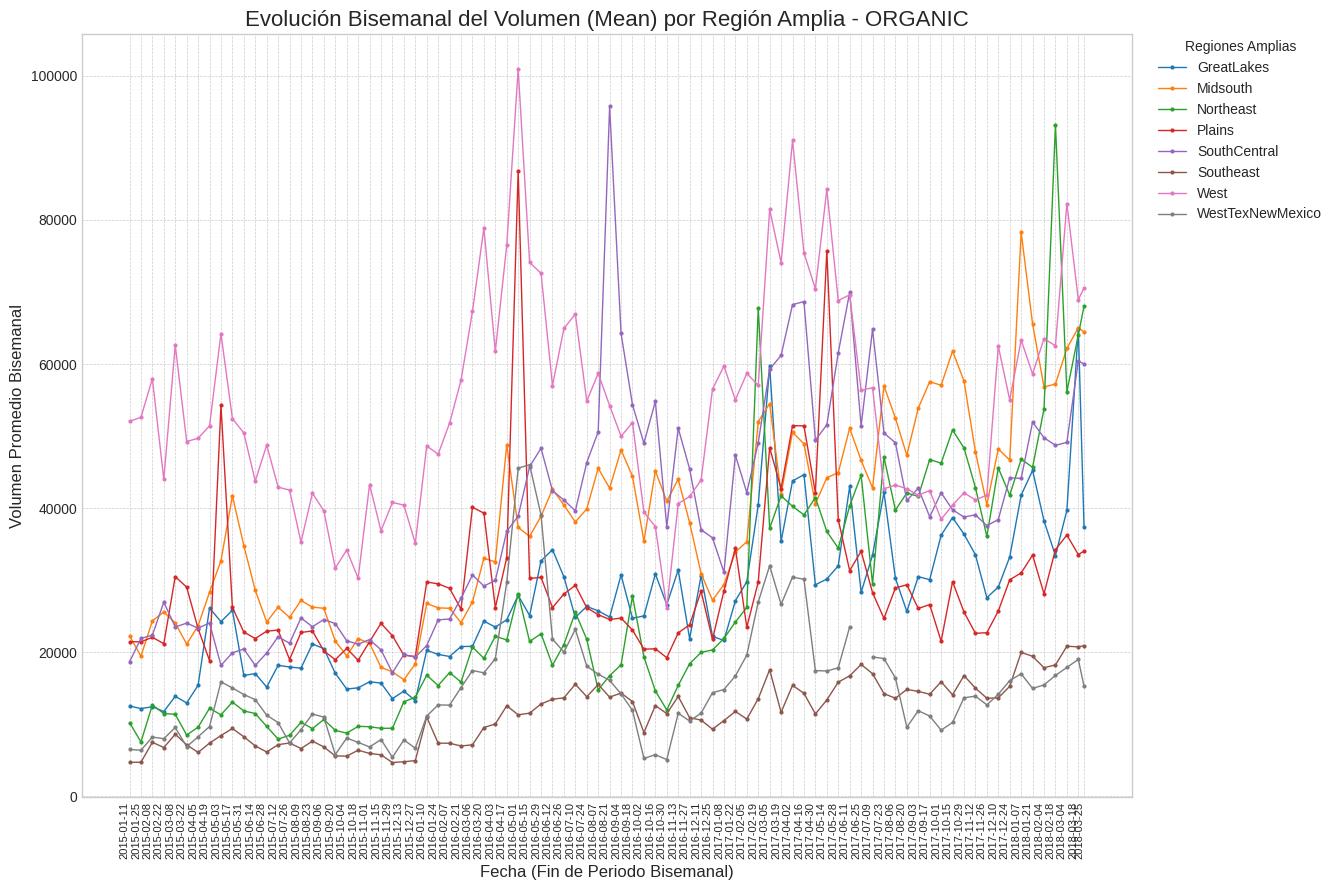


Generando gráfico para 'TotalUS' - Conventional (con todas las fechas)...
Establecidas 85 marcas en el eje X para TotalUS Conventional.


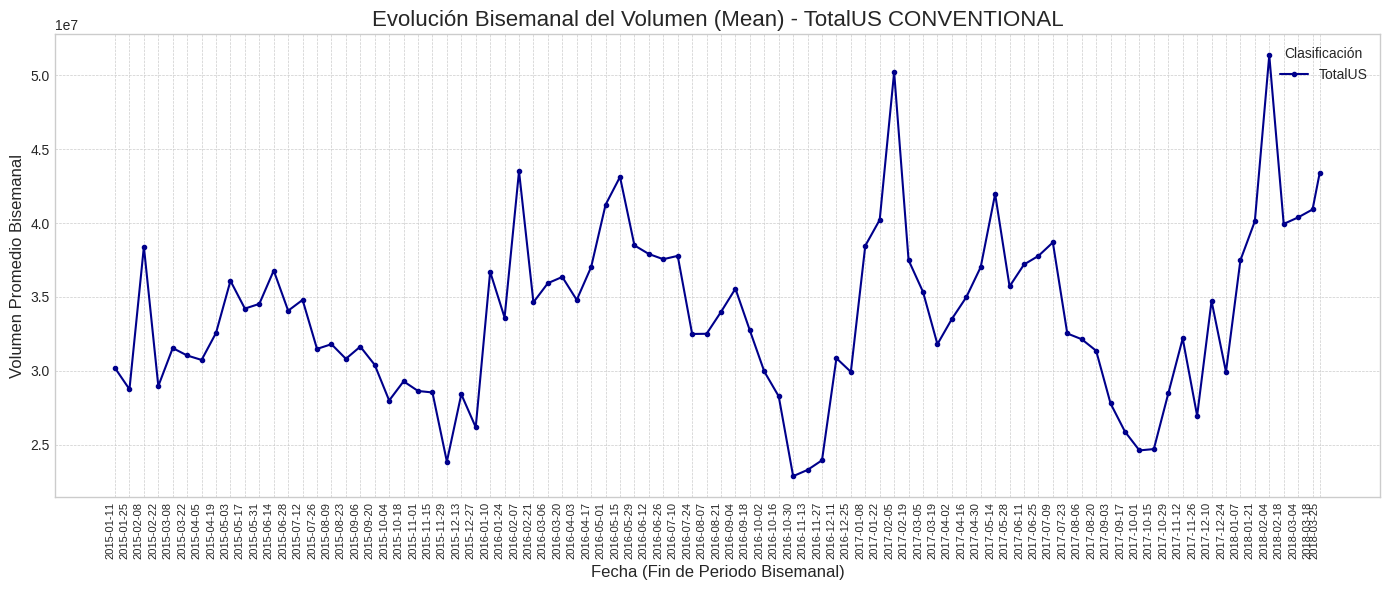

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Necesario para formatear fechas explícitamente

# --- Asumimos que 'final_df_manual' existe y contiene los datos ---
# (Verificaciones omitidas por brevedad, asumiendo que el código anterior funcionó)

# --- Gráfico para 'conventional' ---

print("Preparando datos para el gráfico CONVENTIONAL...")
df_conv = final_df_manual[final_df_manual['type'] == 'conventional'].copy()
try:
    pivot_conv = df_conv.pivot_table(index='Date', columns='Clasificación', values='Total Volume')
    # display(pivot_conv.head(3)) # Comentado para brevedad
except Exception as e:
    print(f"Error al pivotar datos conventional: {e}")
    raise

if 'TotalUS' in pivot_conv.columns:
    regions_conv_to_plot = pivot_conv.drop(columns=['TotalUS'])
else:
    regions_conv_to_plot = pivot_conv

print("Generando gráfico CONVENTIONAL...")
plt.style.use('seaborn-v0_8-whitegrid')
fig_conv, ax_conv = plt.subplots(figsize=(15, 9)) # Aumentar un poco la altura para las etiquetas

# --- Graficar ---
regions_conv_to_plot.plot(ax=ax_conv, marker='.', linestyle='-', linewidth=1, markersize=4)

# --- Personalizar ---
ax_conv.set_title('Evolución Bisemanal del Volumen (Mean) por Región Amplia - CONVENTIONAL', fontsize=16)
ax_conv.set_ylabel('Volumen Promedio Bisemanal', fontsize=12)
ax_conv.set_xlabel('Fecha (Fin de Periodo Bisemanal)', fontsize=12)
ax_conv.grid(True, which='major', linestyle='--', linewidth=0.5)
ax_conv.legend(title='Regiones Amplias', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# --- MODIFICACIÓN: Forzar todas las fechas en el eje X ---
all_dates_conv = regions_conv_to_plot.index # Obtener todas las fechas del índice
ax_conv.set_xticks(all_dates_conv) # Establecer una marca para cada fecha
ax_conv.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Formato de fecha
ax_conv.tick_params(axis='x', rotation=90, labelsize=8) # Rotar 90 grados y reducir tamaño
print(f"Establecidas {len(all_dates_conv)} marcas en el eje X para Conventional.")
# --- Fin de la Modificación ---

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajustar para leyenda
plt.show()


# --- Gráfico para 'organic' ---

print("\nPreparando datos para el gráfico ORGANIC...")
df_org = final_df_manual[final_df_manual['type'] == 'organic'].copy()
try:
    pivot_org = df_org.pivot_table(index='Date', columns='Clasificación', values='Total Volume')
    # display(pivot_org.head(3)) # Comentado para brevedad
except Exception as e:
    print(f"Error al pivotar datos organic: {e}")
    raise

if 'TotalUS' in pivot_org.columns:
    regions_org_to_plot = pivot_org.drop(columns=['TotalUS'])
else:
    regions_org_to_plot = pivot_org

print("Generando gráfico ORGANIC...")
fig_org, ax_org = plt.subplots(figsize=(15, 9)) # Aumentar un poco la altura

# --- Graficar ---
regions_org_to_plot.plot(ax=ax_org, marker='.', linestyle='-', linewidth=1, markersize=4)

# --- Personalizar ---
ax_org.set_title('Evolución Bisemanal del Volumen (Mean) por Región Amplia - ORGANIC', fontsize=16)
ax_org.set_ylabel('Volumen Promedio Bisemanal', fontsize=12)
ax_org.set_xlabel('Fecha (Fin de Periodo Bisemanal)', fontsize=12)
ax_org.grid(True, which='major', linestyle='--', linewidth=0.5)
ax_org.legend(title='Regiones Amplias', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# --- MODIFICACIÓN: Forzar todas las fechas en el eje X ---
all_dates_org = regions_org_to_plot.index # Obtener todas las fechas del índice
ax_org.set_xticks(all_dates_org) # Establecer una marca para cada fecha
ax_org.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Formato de fecha
ax_org.tick_params(axis='x', rotation=90, labelsize=8) # Rotar 90 grados y reducir tamaño
print(f"Establecidas {len(all_dates_org)} marcas en el eje X para Organic.")
# --- Fin de la Modificación ---

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajustar para leyenda
plt.show()


# --- (Opcional) Gráficos separados para 'TotalUS' si se excluyó ---
#     (Aplicar la misma lógica de set_xticks si se generan estos gráficos)

# Ejemplo para TotalUS Conventional:
if 'TotalUS' in pivot_conv.columns:
    print("\nGenerando gráfico para 'TotalUS' - Conventional (con todas las fechas)...")
    fig_us_conv, ax_us_conv = plt.subplots(figsize=(14, 6)) # Un poco más de altura
    pivot_conv[['TotalUS']].plot(ax=ax_us_conv, marker='.', color='darkblue')
    ax_us_conv.set_title('Evolución Bisemanal del Volumen (Mean) - TotalUS CONVENTIONAL', fontsize=16)
    ax_us_conv.set_ylabel('Volumen Promedio Bisemanal', fontsize=12)
    ax_us_conv.set_xlabel('Fecha (Fin de Periodo Bisemanal)', fontsize=12)
    ax_us_conv.grid(True, which='major', linestyle='--', linewidth=0.5)

    # --- MODIFICACIÓN: Forzar todas las fechas en el eje X ---
    all_dates_tus_conv = pivot_conv.index # Obtener todas las fechas del índice
    ax_us_conv.set_xticks(all_dates_tus_conv) # Establecer una marca para cada fecha
    ax_us_conv.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Formato
    ax_us_conv.tick_params(axis='x', rotation=90, labelsize=8) # Rotar y ajustar tamaño
    print(f"Establecidas {len(all_dates_tus_conv)} marcas en el eje X para TotalUS Conventional.")
    # --- Fin de la Modificación ---

    plt.tight_layout() # Ajuste general
    plt.show()

# (Repetir lógica similar para TotalUS Organic si es necesario)
# ... (código para TotalUS Organic omitido por brevedad, pero seguiría el mismo patrón)

Preparando datos base (pivotados y sin TotalUS)...
Datos base preparados.

Calculando tendencia con media móvil (ventana=6 periodos)...
Tendencias calculadas.
Generando gráfico de TENDENCIA CONVENTIONAL...


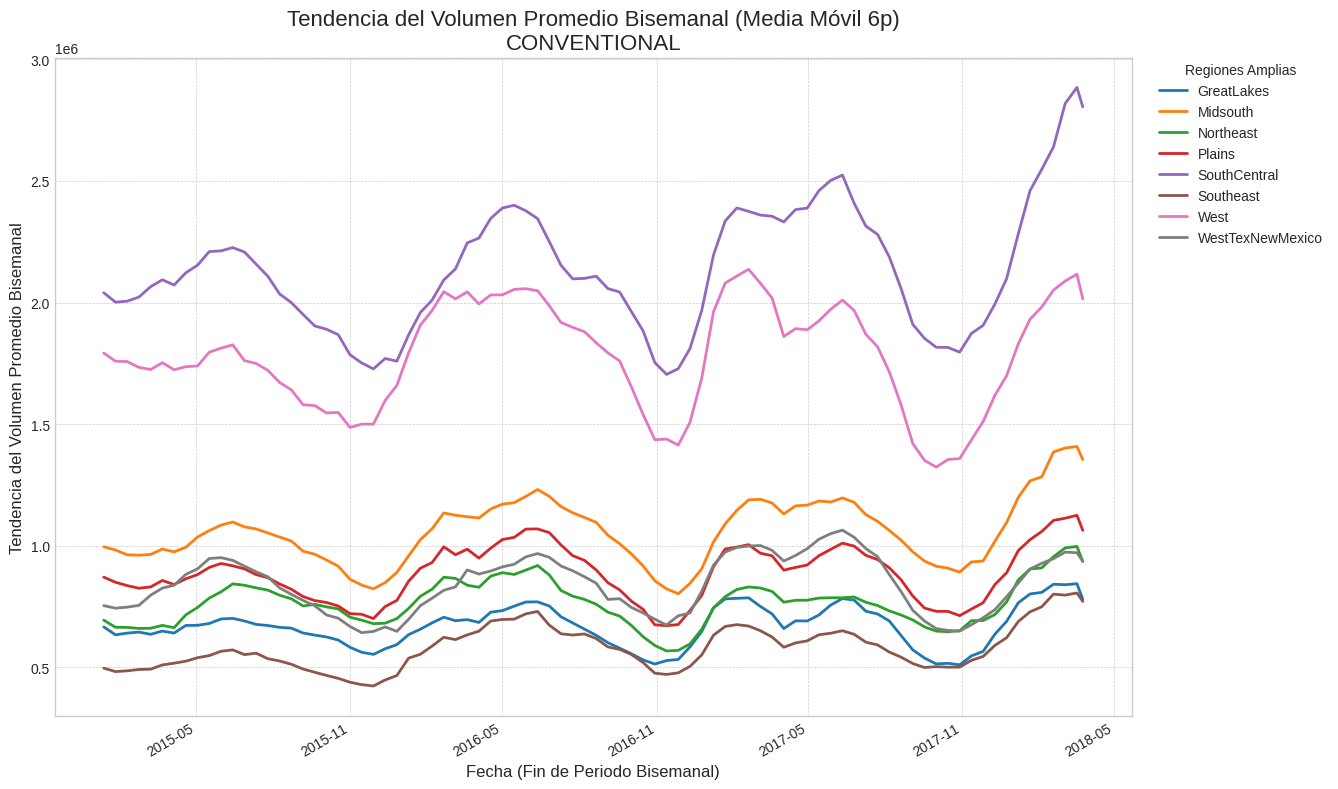


Generando gráfico de TENDENCIA ORGANIC...


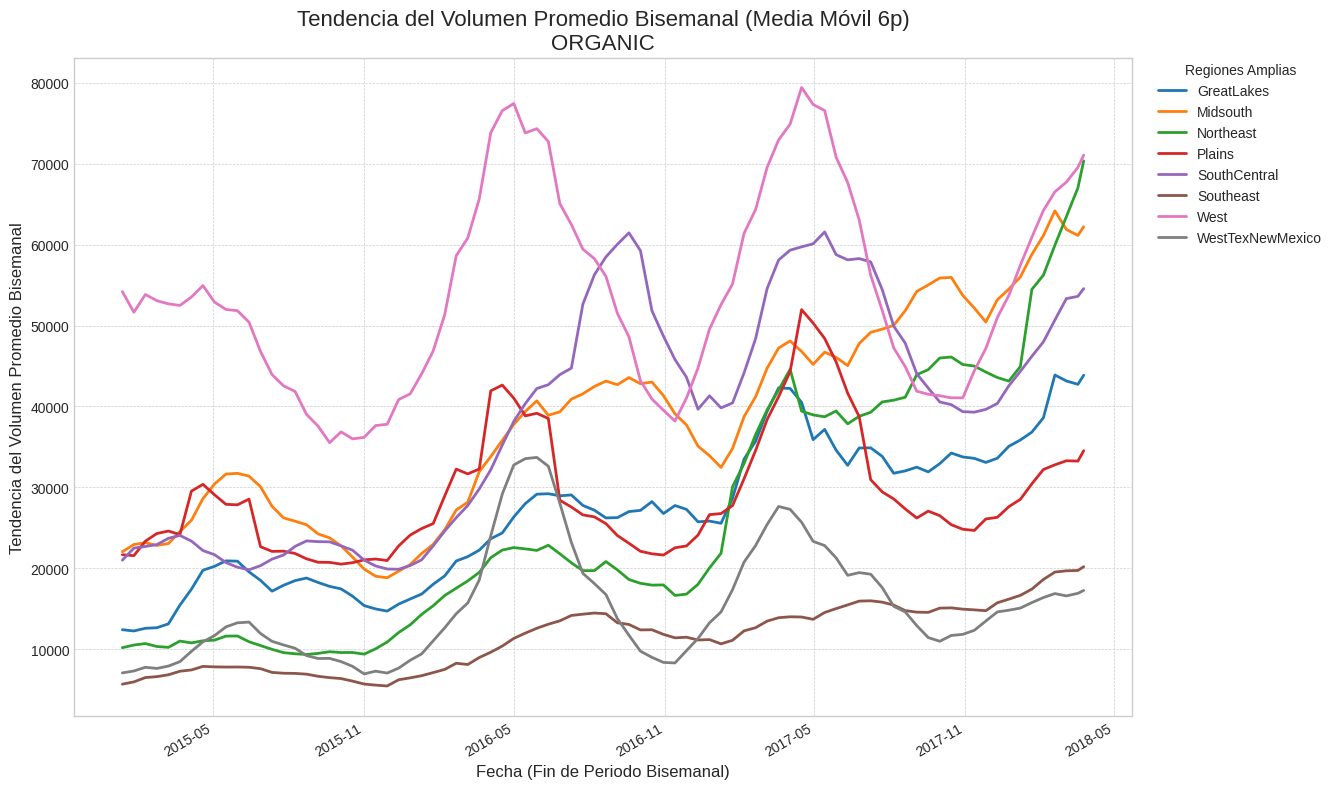

In [9]:
import pandas as pd
import numpy as np # Importado por si acaso, aunque no se use directamente aquí
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Asumimos que 'final_df_manual' existe y el código anterior ---
#     que crea 'pivot_conv' y 'pivot_org' se ha ejecutado.

# --- Recrear los DataFrames pivotados y filtrados si es necesario ---
# (Si ya existen en tu entorno, puedes comentar estas secciones)

print("Preparando datos base (pivotados y sin TotalUS)...")
# Conventional
df_conv = final_df_manual[final_df_manual['type'] == 'conventional'].copy()
try:
    pivot_conv = df_conv.pivot_table(index='Date', columns='Clasificación', values='Total Volume')
except Exception as e:
    print(f"Error al pivotar datos conventional: {e}")
    raise
if 'TotalUS' in pivot_conv.columns:
    regions_conv_to_plot = pivot_conv.drop(columns=['TotalUS'])
else:
    regions_conv_to_plot = pivot_conv

# Organic
df_org = final_df_manual[final_df_manual['type'] == 'organic'].copy()
try:
    pivot_org = df_org.pivot_table(index='Date', columns='Clasificación', values='Total Volume')
except Exception as e:
    print(f"Error al pivotar datos organic: {e}")
    raise
if 'TotalUS' in pivot_org.columns:
    regions_org_to_plot = pivot_org.drop(columns=['TotalUS'])
else:
    regions_org_to_plot = pivot_org

print("Datos base preparados.")

# --- Calcular Tendencia con Media Móvil ---

# Definir la ventana para la media móvil (6 periodos = ~3 meses)
window_size = 6
# min_periods: mínimo de observaciones en la ventana para producir un valor (útil al principio/final)
# center=True: la etiqueta de la media móvil se alinea con el centro de la ventana
print(f"\nCalculando tendencia con media móvil (ventana={window_size} periodos)...")

trend_conv = regions_conv_to_plot.rolling(window=window_size, center=True, min_periods=window_size // 2).mean()
trend_org = regions_org_to_plot.rolling(window=window_size, center=True, min_periods=window_size // 2).mean()

print("Tendencias calculadas.")

# --- Gráfico de Tendencia para 'conventional' ---

print("Generando gráfico de TENDENCIA CONVENTIONAL...")
plt.style.use('seaborn-v0_8-whitegrid')
fig_conv_trend, ax_conv_trend = plt.subplots(figsize=(15, 8))

# --- Graficar la Tendencia ---
# Usamos líneas sólidas y quizás un poco más gruesas para la tendencia
trend_conv.plot(ax=ax_conv_trend, linestyle='-', linewidth=2)

# --- Personalizar ---
ax_conv_trend.set_title(f'Tendencia del Volumen Promedio Bisemanal (Media Móvil {window_size}p)\nCONVENTIONAL', fontsize=16)
ax_conv_trend.set_ylabel('Tendencia del Volumen Promedio Bisemanal', fontsize=12)
ax_conv_trend.set_xlabel('Fecha (Fin de Periodo Bisemanal)', fontsize=12)
ax_conv_trend.grid(True, which='major', linestyle='--', linewidth=0.5)
ax_conv_trend.legend(title='Regiones Amplias', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# --- Formatear eje X (quizás no forzar todos los ticks para la tendencia) ---
ax_conv_trend.xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # Marcas cada 6 meses (ajustable)
ax_conv_trend.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Formato Año-Mes
plt.gcf().autofmt_xdate() # Rotar fechas si se solapan
# --- Fin Formato Eje X ---

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajustar para leyenda
plt.show()


# --- Gráfico de Tendencia para 'organic' ---

print("\nGenerando gráfico de TENDENCIA ORGANIC...")
fig_org_trend, ax_org_trend = plt.subplots(figsize=(15, 8))

# --- Graficar la Tendencia ---
trend_org.plot(ax=ax_org_trend, linestyle='-', linewidth=2)

# --- Personalizar ---
ax_org_trend.set_title(f'Tendencia del Volumen Promedio Bisemanal (Media Móvil {window_size}p)\nORGANIC', fontsize=16)
ax_org_trend.set_ylabel('Tendencia del Volumen Promedio Bisemanal', fontsize=12)
ax_org_trend.set_xlabel('Fecha (Fin de Periodo Bisemanal)', fontsize=12)
ax_org_trend.grid(True, which='major', linestyle='--', linewidth=0.5)
ax_org_trend.legend(title='Regiones Amplias', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# --- Formatear eje X ---
ax_org_trend.xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # Marcas cada 6 meses
ax_org_trend.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Formato Año-Mes
plt.gcf().autofmt_xdate() # Rotar fechas
# --- Fin Formato Eje X ---

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajustar para leyenda
plt.show()

##VIOLIN

DataFrame 'avocado.csv' cargado correctamente.
Preparando datos para las regiones seleccionadas...
DataFrames df_conv_selected y df_org_selected creados.
No se pudo generar el gráfico de violín para Conventional (Regiones Seleccionadas).

Generando gráfico de violín ORGANIC (Regiones Seleccionadas)...


<ipython-input-10-27e73c3a6e0b>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_org_selected,


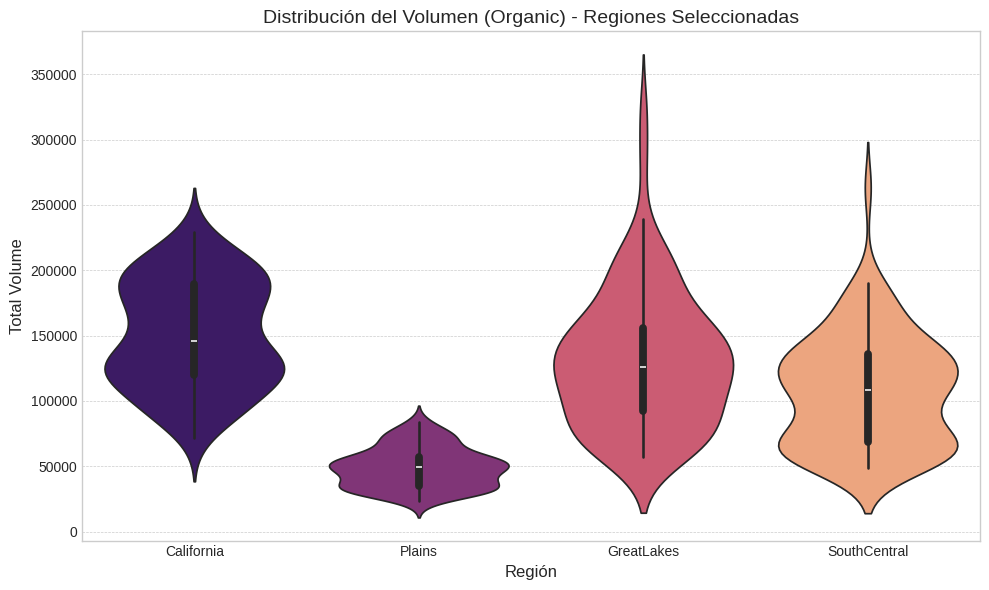

In [10]:
# -*- coding: utf-8 -*-
# --- Código para Google Colab ---

# 1. Instalar bibliotecas si es necesario (normalmente ya están en Colab)
# !pip install pandas seaborn matplotlib

# 2. Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Cargar los datos
# Asegúrate de que 'avocado.csv' esté accesible en tu entorno de Colab
# Por ejemplo, si lo subiste directamente a la sesión:
try:
  df_avocado = df_org
  print("DataFrame 'avocado.csv' cargado correctamente.")
except FileNotFoundError:
  print("Error: No se encontró el archivo 'avocado.csv'.")
  print("Por favor, súbelo a tu sesión de Colab o monta Google Drive y ajusta la ruta.")
  # Puedes detener la ejecución o manejar el error como prefieras
  # Por ejemplo: raise

# --- Inicio del código de graficación ---
if 'df_avocado' in locals(): # Solo ejecuta si el DataFrame se cargó

    # Define las regiones específicas solicitadas
    selected_regions = ['California', 'Plains', 'GreatLakes', 'SouthCentral']

    # Filtrar el DataFrame original para incluir solo las regiones seleccionadas
    # Usamos .copy() para evitar advertencias
    df_selected = df_avocado[df_avocado['region'].isin(selected_regions)].copy()

    # --- Preparar datos para gráficos de violín ---
    print("Preparando datos para las regiones seleccionadas...")
    df_conv_selected = df_selected[df_selected['type'] == 'conventional'].copy()
    df_org_selected = df_selected[df_selected['type'] == 'organic'].copy()
    print("DataFrames df_conv_selected y df_org_selected creados.")

    # --- Gráfico de Violín para 'conventional' (Regiones Seleccionadas) ---
    if not df_conv_selected.empty:
        print("\nGenerando gráfico de violín CONVENTIONAL (Regiones Seleccionadas)...")
        plt.style.use('seaborn-v0_8-whitegrid') # Estilo del gráfico
        plt.figure(figsize=(10, 6)) # Tamaño del gráfico

        # Crear el gráfico de violín
        sns.violinplot(data=df_conv_selected,
                       x='region',        # Eje X: Regiones
                       y='Total Volume',  # Eje Y: Volumen total
                       order=selected_regions, # Orden específico de regiones en el eje X
                       palette='viridis') # Paleta de colores

        # Personalizar títulos y etiquetas
        plt.title('Distribución del Volumen (Conventional) - Regiones Seleccionadas', fontsize=14)
        plt.ylabel('Total Volume', fontsize=12)
        plt.xlabel('Región', fontsize=12)
        plt.xticks(rotation=0) # Rotación de etiquetas del eje X
        plt.grid(True, axis='y', linestyle='--', linewidth=0.5) # Añadir rejilla horizontal
        plt.tight_layout() # Ajustar diseño para evitar solapamientos
        plt.show() # Mostrar el gráfico
    else:
        print("No se pudo generar el gráfico de violín para Conventional (Regiones Seleccionadas).")


    # --- Gráfico de Violín para 'organic' (Regiones Seleccionadas) ---
    if not df_org_selected.empty:
        print("\nGenerando gráfico de violín ORGANIC (Regiones Seleccionadas)...")
        plt.figure(figsize=(10, 6))

        # Crear el gráfico de violín
        sns.violinplot(data=df_org_selected,
                       x='region',
                       y='Total Volume',
                       order=selected_regions,
                       palette='magma') # Paleta de colores diferente

        # Personalizar títulos y etiquetas
        plt.title('Distribución del Volumen (Organic) - Regiones Seleccionadas', fontsize=14)
        plt.ylabel('Total Volume', fontsize=12)
        plt.xlabel('Región', fontsize=12)
        plt.xticks(rotation=0)
        plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show() # Mostrar el gráfico
    else:
        print("No se pudo generar el gráfico de violín para Organic (Regiones Seleccionadas).")

# --- Fin del código de graficación ---

Usando DataFrame 'df_avocado' existente.
Preparando datos para las regiones seleccionadas...
DataFrames df_conv_selected y df_org_selected creados/listos.
No se pudo generar el Box Plot para Conventional (Regiones Seleccionadas).

Generando Box Plot ORGANIC (Regiones Seleccionadas)...


<ipython-input-11-646cc251cf6f>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_org_selected,


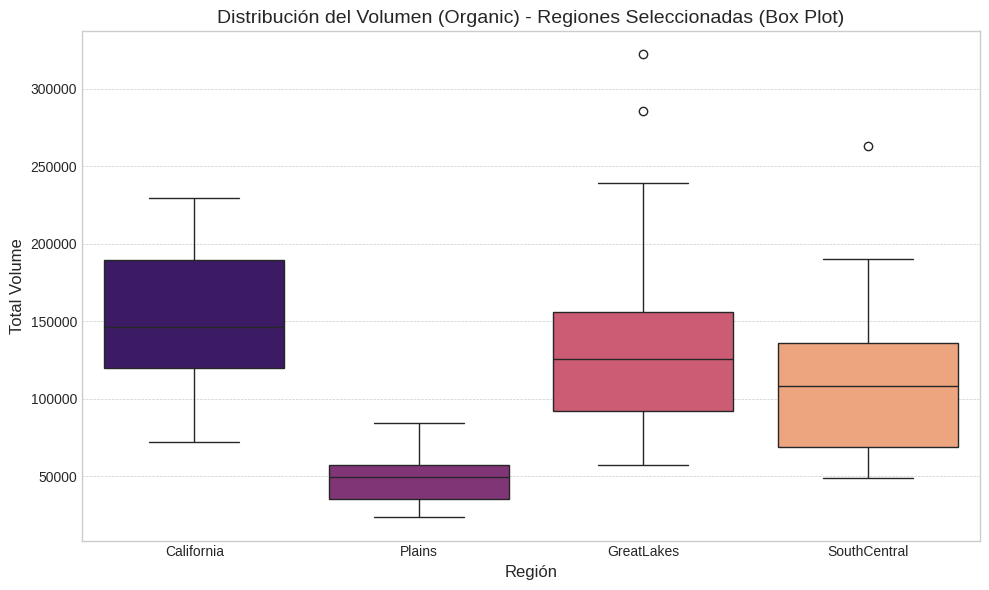

In [11]:
# -*- coding: utf-8 -*-
# --- Código para Box Plots de Regiones Seleccionadas ---

# 1. Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Cargar los datos
# Asegúrate de que 'avocado.csv' esté accesible.
# En Colab, súbelo o monta Drive y ajusta la ruta si es necesario.
try:
  # Asumimos que df_avocado ya existe de pasos anteriores.
  # Si no, cargamos el CSV:
  if 'df_avocado' not in locals():
      df_avocado = df_conv
      print("DataFrame 'avocado.csv' cargado.")
  else:
      print("Usando DataFrame 'df_avocado' existente.")
except FileNotFoundError:
  print("Error: No se encontró el archivo 'avocado.csv'.")
  print("Asegúrate de que el archivo esté en la ubicación correcta.")
  # Detener o manejar el error
  raise

# --- Inicio del código de graficación ---
if 'df_avocado' in locals(): # Solo ejecuta si el DataFrame se cargó

    # Define las regiones específicas solicitadas
    selected_regions = ['California', 'Plains', 'GreatLakes', 'SouthCentral']

    # Filtrar el DataFrame original para incluir solo las regiones seleccionadas
    # Usamos .copy() para evitar advertencias
    df_selected = df_avocado[df_avocado['region'].isin(selected_regions)].copy()

    # --- Preparar datos para gráficos de boxplot ---
    print("Preparando datos para las regiones seleccionadas...")
    df_conv_selected = df_selected[df_selected['type'] == 'conventional'].copy()
    df_org_selected = df_selected[df_selected['type'] == 'organic'].copy()
    print("DataFrames df_conv_selected y df_org_selected creados/listos.")


    # --- Gráfico de Box Plot para 'conventional' (Regiones Seleccionadas) ---
    if not df_conv_selected.empty:
        print("\nGenerando Box Plot CONVENTIONAL (Regiones Seleccionadas)...")
        plt.style.use('seaborn-v0_8-whitegrid') # Estilo del gráfico
        plt.figure(figsize=(10, 6)) # Tamaño del gráfico

        # Crear el Box Plot
        sns.boxplot(data=df_conv_selected,
                    x='region',        # Eje X: Regiones
                    y='Total Volume',  # Eje Y: Volumen total
                    order=selected_regions, # Asegurar el orden solicitado
                    palette='viridis', # Paleta de colores
                    showfliers=True) # Mostrar outliers (puntos individuales)

        # Personalizar títulos y etiquetas
        plt.title('Distribución del Volumen (Conventional) - Regiones Seleccionadas (Box Plot)', fontsize=14)
        plt.ylabel('Total Volume', fontsize=12)
        plt.xlabel('Región', fontsize=12)
        plt.xticks(rotation=0) # Rotación de etiquetas del eje X
        plt.grid(True, axis='y', linestyle='--', linewidth=0.5) # Rejilla horizontal
        plt.tight_layout() # Ajustar diseño
        plt.show() # Mostrar el gráfico
    else:
        print("No se pudo generar el Box Plot para Conventional (Regiones Seleccionadas).")


    # --- Gráfico de Box Plot para 'organic' (Regiones Seleccionadas) ---
    if not df_org_selected.empty:
        print("\nGenerando Box Plot ORGANIC (Regiones Seleccionadas)...")
        plt.figure(figsize=(10, 6))

        # Crear el Box Plot
        sns.boxplot(data=df_org_selected,
                    x='region',
                    y='Total Volume',
                    order=selected_regions,
                    palette='magma', # Paleta de colores diferente
                    showfliers=True) # Mostrar outliers

        # Personalizar títulos y etiquetas
        plt.title('Distribución del Volumen (Organic) - Regiones Seleccionadas (Box Plot)', fontsize=14)
        plt.ylabel('Total Volume', fontsize=12)
        plt.xlabel('Región', fontsize=12)
        plt.xticks(rotation=0)
        plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show() # Mostrar el gráfico
    else:
        print("No se pudo generar el Box Plot para Organic (Regiones Seleccionadas).")

# --- Fin del código de graficación ---

In [12]:
# -*- coding: utf-8 -*-
# --- Código para Identificar Outliers en Google Colab ---

# 1. Instalar bibliotecas si es necesario (normalmente ya están en Colab)
# !pip install pandas

# 2. Importar bibliotecas
import pandas as pd

# 3. Cargar los datos
# Asegúrate de que 'avocado.csv' esté accesible en tu entorno de Colab
# Por ejemplo, si lo subiste directamente a la sesión:
try:
  # Intentamos usar df_avocado si ya existe de pasos anteriores
  if 'df_avocado' not in locals():
      df_avocado = df_org
      print("DataFrame 'avocado.csv' cargado.")
      # Convertir 'Date' a datetime si se acaba de cargar
      if pd.api.types.is_string_dtype(df_avocado['Date']):
          df_avocado['Date'] = pd.to_datetime(df_avocado['Date'])
          print("Columna 'Date' convertida a datetime.")
  else:
      print("Usando DataFrame 'df_avocado' existente.")
      # Asegurarse de que 'Date' sea datetime en el DF existente
      if pd.api.types.is_string_dtype(df_avocado['Date']):
          df_avocado['Date'] = pd.to_datetime(df_avocado['Date'])
          print("Columna 'Date' convertida a datetime.")

except FileNotFoundError:
  print("Error: No se encontró el archivo 'avocado.csv'.")
  print("Por favor, súbelo a tu sesión de Colab o monta Google Drive y ajusta la ruta.")
  # Detener o manejar el error
  raise
except Exception as e:
  print(f"Ocurrió un error al cargar o preparar el DataFrame: {e}")
  raise

# --- Inicio del código para identificar outliers ---
if 'df_avocado' in locals(): # Solo ejecuta si el DataFrame está listo

    # Define las regiones específicas solicitadas
    selected_regions = ['California', 'Plains', 'GreatLakes', 'SouthCentral']

    # Filtrar el DataFrame original para incluir solo las regiones seleccionadas
    # Usamos .copy() para evitar advertencias
    df_selected = df_avocado[df_avocado['region'].isin(selected_regions)].copy()

    # --- Calcular límites para detectar outliers ---
    print("\nCalculando límites Q1, Q3 e IQR por región y tipo...")

    # Calcular Q1 (percentil 25) y Q3 (percentil 75) para Total Volume agrupado
    Q1 = df_selected.groupby(['region', 'type'])['Total Volume'].quantile(0.25)
    Q3 = df_selected.groupby(['region', 'type'])['Total Volume'].quantile(0.75)

    # Calcular IQR (Rango Intercuartílico)
    IQR = Q3 - Q1

    # Crear un DataFrame con los límites
    iqr_stats = pd.DataFrame({'Q1': Q1, 'Q3': Q3, 'IQR': IQR})
    iqr_stats['Lower_Bound'] = iqr_stats['Q1'] - 1.5 * iqr_stats['IQR']
    iqr_stats['Upper_Bound'] = iqr_stats['Q3'] + 1.5 * iqr_stats['IQR']

    print("Límites calculados:")
    # Usar print(iqr_stats) o display(iqr_stats) en Colab para ver la tabla
    # print(iqr_stats.to_markdown(numalign="left", stralign="left")) # Formato Markdown opcional

    # --- Identificar los outliers ---
    print("\nIdentificando outliers...")
    # Añadir los límites al DataFrame seleccionado (uniendo por índice múltiple)
    # Necesitamos asegurar que el índice de df_selected coincida para el join
    df_with_bounds = df_selected.set_index(['region', 'type']).join(iqr_stats, how='left')

    # Filtrar las filas donde Total Volume está fuera de los límites
    outliers_df = df_with_bounds[
        (df_with_bounds['Total Volume'] < df_with_bounds['Lower_Bound']) |
        (df_with_bounds['Total Volume'] > df_with_bounds['Upper_Bound'])
    ].copy() # Usar .copy() aquí también

    # Resetear el índice para tener 'region' y 'type' como columnas de nuevo
    outliers_df.reset_index(inplace=True)

    # Seleccionar y ordenar las columnas relevantes
    outliers_info = outliers_df[['region', 'type', 'Date', 'Total Volume']].sort_values(
        by=['region', 'type', 'Date']
    )

    # --- Imprimir los resultados ---
    print("\n--- Outliers Identificados (según regla 1.5 * IQR) ---")
    if outliers_info.empty:
        print("No se encontraron outliers en las regiones y tipos seleccionados.")
    else:
        # En Colab, display() ofrece una mejor visualización de DataFrames
        from IPython.display import display
        display(outliers_info)
        # O si prefieres texto plano:
        # print(outliers_info.to_string(index=False))

# --- Fin del código ---

Usando DataFrame 'df_avocado' existente.

Calculando límites Q1, Q3 e IQR por región y tipo...
Límites calculados:

Identificando outliers...

--- Outliers Identificados (según regla 1.5 * IQR) ---


,region,type,Date,Total Volume
0,GreatLakes,organic,2017-03-05,286030.070
1,GreatLakes,organic,2018-03-18,322246.650
2,SouthCentral,organic,2016-08-21,263166.655


DataFrame 'df2' encontrado y con columnas necesarias.

Generando histograma de AveragePrice desde df2 (Conventional=Azul, Organic=Verde)...


<ipython-input-13-dfdbd77623c0>:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=handles, labels=labels, title='Tipo')


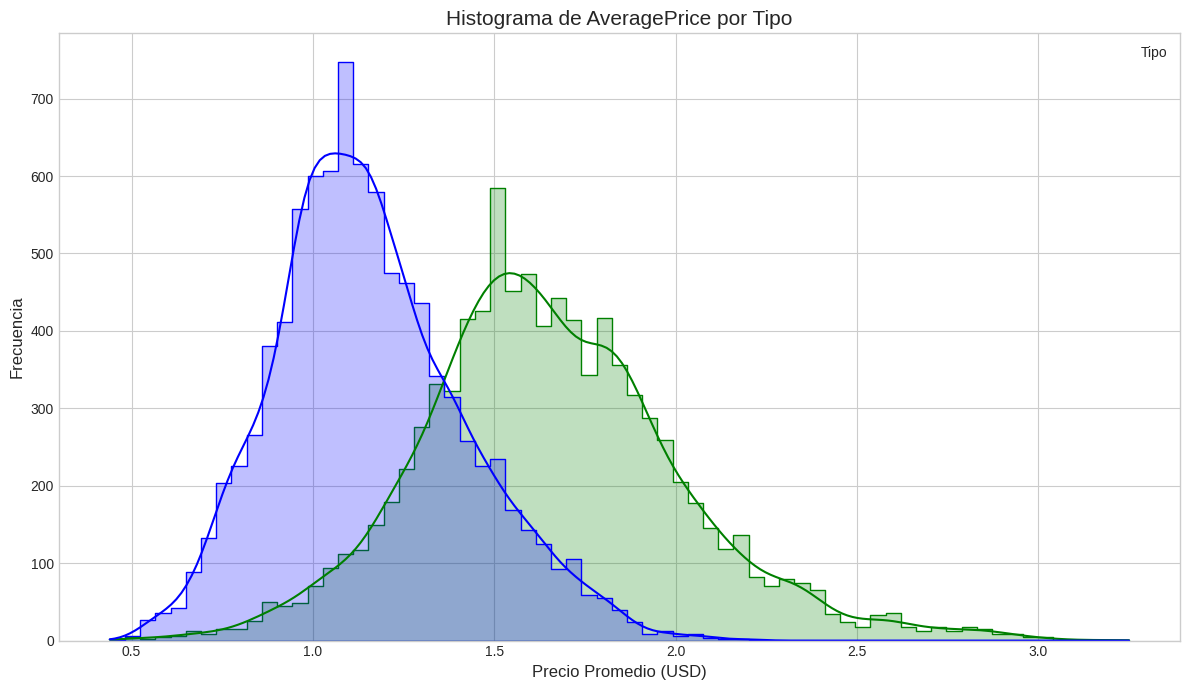

In [13]:
# -*- coding: utf-8 -*-
# --- Código para Google Colab usando DataFrame 'df2' ---

# 1. Instalar bibliotecas si es necesario (normalmente ya están en Colab)
# !pip install pandas seaborn matplotlib

# 2. Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Cargar los datos en df2
# Asegúrate de que tu DataFrame llamado 'df2' esté cargado
# y contenga las columnas 'AveragePrice' y 'type'.
# Ejemplo:
# df2 = pd.read_csv('tu_archivo.csv') # O como hayas cargado df2

# --- Comprobación de existencia de df2 (recomendado) ---
if 'df2' not in locals():
    print("Error: El DataFrame 'df2' no parece estar definido.")
    print("Asegúrate de haber cargado tus datos en una variable llamada 'df2'.")
    # Detener ejecución o manejar el error
    raise NameError("DataFrame 'df2' no definido.")
elif not all(col in df2.columns for col in ['AveragePrice', 'type']):
    print("Error: El DataFrame 'df2' no contiene las columnas necesarias ('AveragePrice', 'type').")
    raise KeyError("Columnas necesarias no encontradas en df2.")
else:
    print("DataFrame 'df2' encontrado y con columnas necesarias.")

    # --- Crear el histograma de AveragePrice separado por tipo con colores específicos ---
    print("\nGenerando histograma de AveragePrice desde df2 (Conventional=Azul, Organic=Verde)...")

    plt.style.use('seaborn-v0_8-whitegrid') # Estilo del gráfico
    plt.figure(figsize=(12, 7)) # Tamaño del gráfico

    # Definir la paleta de colores solicitada
    palette_colors = {'conventional': 'blue', 'organic': 'green'}

    # Crear el histograma usando Seaborn histplot con 'hue' y la paleta personalizada
    # Usando el DataFrame df2
    sns.histplot(data=df2,
                 x='AveragePrice',
                 hue='type',
                 palette=palette_colors,
                 kde=True, # Añadir línea de densidad
                 element="step", # Usar 'step' para mejor visualización de superposición
                 #alpha=0.7 # Alternativa a 'step', usar transparencia con 'bars'
                )

    # Personalizar títulos y etiquetas
    plt.title('Histograma de AveragePrice por Tipo', fontsize=15)
    plt.xlabel('Precio Promedio (USD)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Crear leyenda manualmente para asegurar colores correctos con 'step'
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels, title='Tipo')


    plt.tight_layout() # Ajustar diseño
    plt.show() # Mostrar el gráfico

# --- Fin del código ---

<ipython-input-14-7270f2179ec4>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_midsouth_conv,


DataFrame 'df2' encontrado y con columnas necesarias.

Generando Box Plot (Conventional) de Total Volume por Año para: GreatLakes ..


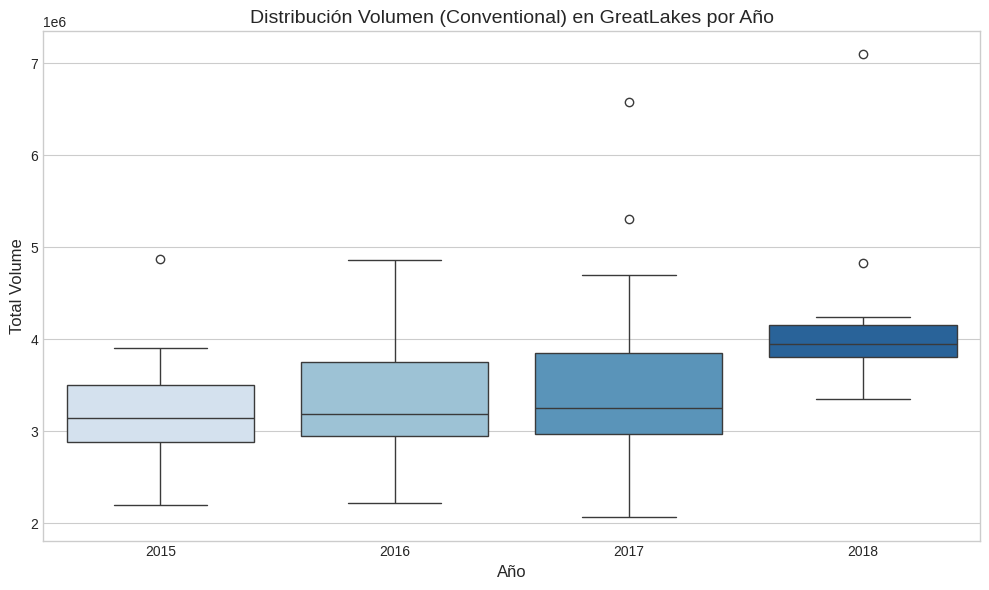


Generando Box Plot (Organic) de Total Volume por Año para: GreatLakes (desde df2)...


<ipython-input-14-7270f2179ec4>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_midsouth_org,


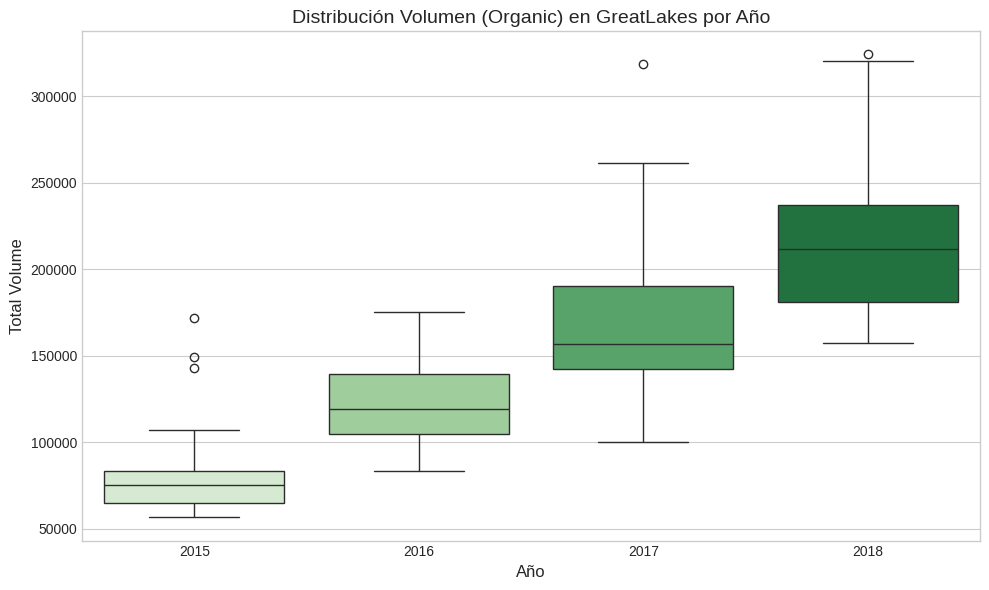

In [14]:
# -*- coding: utf-8 -*-
# --- Código para Google Colab usando DataFrame 'df2' ---

# 1. Instalar bibliotecas si es necesario
# !pip install pandas seaborn matplotlib

# 2. Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Cargar/asegurar que df2 existe
# Asegúrate de que tu DataFrame 'df2' esté cargado y contenga
# las columnas 'region', 'year', 'type', y 'Total Volume'.
# Ejemplo:
# df2 = pd.read_csv('tu_archivo.csv') # O como lo hayas cargado

# --- Comprobación de existencia y columnas de df2 (recomendado) ---
if 'df2' not in locals():
    print("Error: El DataFrame 'df2' no parece estar definido.")
    print("Asegúrate de haber cargado tus datos en una variable llamada 'df2'.")
    raise NameError("DataFrame 'df2' no definido.")
elif not all(col in df2.columns for col in ['region', 'year', 'type', 'Total Volume']):
    print("Error: El DataFrame 'df2' no contiene las columnas necesarias ('region', 'year', 'type', 'Total Volume').")
    raise KeyError("Columnas necesarias no encontradas en df2.")
else:
    print("DataFrame 'df2' encontrado y con columnas necesarias.")

    # --- Filtrar datos para la región 'Midsouth' desde df2 ---
    target_region = 'GreatLakes'
    # IMPORTANTE: Usar df2 aquí para filtrar
    df_midsouth = df2[df2['region'] == target_region].copy()

    # --- Crear Box Plots separados por Tipo y Año para Midsouth ---
    if df_midsouth.empty:
        print(f"No se encontraron datos para la región: {target_region} en df2.")
    else:
        # Ordenar los años para el eje X
        year_order_midsouth = sorted(df_midsouth['year'].unique())

        # --- Gráfico 1: Conventional ---
        df_midsouth_conv = df_midsouth[df_midsouth['type'] == 'conventional']
        if not df_midsouth_conv.empty:
            print(f"\nGenerando Box Plot (Conventional) de Total Volume por Año para: {target_region} ..")
            plt.style.use('seaborn-v0_8-whitegrid')
            plt.figure(figsize=(10, 6))

            sns.boxplot(data=df_midsouth_conv,
                        x='year',
                        y='Total Volume',
                        order=year_order_midsouth,
                        palette='Blues', # Paleta de azules
                        showfliers=True)

            plt.title(f'Distribución Volumen (Conventional) en {target_region} por Año', fontsize=14)
            plt.xlabel('Año', fontsize=12)
            plt.ylabel('Total Volume', fontsize=12)
            plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # Notación científica
            plt.tight_layout()
            plt.show()
        else:
             print(f"No se encontraron datos 'conventional' para la región: {target_region} en df2.")


        # --- Gráfico 2: Organic ---
        df_midsouth_org = df_midsouth[df_midsouth['type'] == 'organic']
        if not df_midsouth_org.empty:
            print(f"\nGenerando Box Plot (Organic) de Total Volume por Año para: {target_region} (desde df2)...")
            plt.figure(figsize=(10, 6)) # Nuevo gráfico

            sns.boxplot(data=df_midsouth_org,
                        x='year',
                        y='Total Volume',
                        order=year_order_midsouth,
                        palette='Greens', # Paleta de verdes
                        showfliers=True)

            plt.title(f'Distribución Volumen (Organic) en {target_region} por Año', fontsize=14)
            plt.xlabel('Año', fontsize=12)
            plt.ylabel('Total Volume', fontsize=12)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No se encontraron datos 'organic' para la región: {target_region}.")

# --- Fin del código ---

tabla ordenadad por fechas

In [15]:
df_avocado.sort_values(by='Date', ascending=True)

,type,region,Clasificación,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
4590,organic,Albany,Northeast,2015-01-11,1.78,1278.255,48.210,229.500,0.000,1000.545,1000.545,0.000,0.0
5355,organic,CincinnatiDayton,GreatLakes,2015-01-11,1.33,10039.050,176.995,8636.960,0.000,1225.095,448.290,776.805,0.0
7820,organic,RichmondNorfolk,Southeast,2015-01-11,1.60,3563.255,191.130,1869.635,321.735,1180.755,991.545,189.210,0.0
5270,organic,Chicago,GreatLakes,2015-01-11,1.64,15319.455,1308.050,13264.185,0.000,747.220,747.220,0.000,0.0
7905,organic,Roanoke,Southeast,2015-01-11,1.43,4771.175,69.575,3413.145,0.000,1288.455,972.950,315.505,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7224,organic,NorthernNewEngland,Northeast,2018-03-25,1.63,22596.130,9.440,257.670,0.000,22329.020,22329.020,0.000,0.0
7139,organic,Northeast,Northeast,2018-03-25,1.58,374859.680,19823.160,58366.540,201.040,296468.940,265716.880,30752.060,0.0
7054,organic,NewYork,Northeast,2018-03-25,1.86,118503.550,12695.300,35094.500,205.590,70508.160,70377.520,130.640,0.0
6799,organic,Midsouth,Midsouth,2018-03-25,1.55,181040.190,3445.850,41893.240,641.590,135059.510,125890.810,9168.700,0.0
